In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join

In [2]:
def calculate_summary(path, out):
    files = [join(path, f) for f in listdir(path) if isfile(join(path, f))]
    finals = []
    for file in files:
        reader = pd.read_csv(file)
        finals.append(reader.loc[reader['step'] == 99])

    finals[0]

    total_readers = len(files)
    total_rows = len(finals[0]['firstPoints'])

    firstPoints = {}
    secondPoints = {}

    for reader in finals:
        for i, value in enumerate(reader['firstPoints']):
            firstPoints.setdefault(i, [])
            firstPoints[i].append(float(value))
        for i, value in enumerate(reader['secondPoints']):
            secondPoints.setdefault(i, [])
            secondPoints[i].append(float(value))

    mean1 = []
    mean2 = []
    std1 = []
    std2 = []
    for diff in firstPoints.keys():
        mean1.append(np.mean(firstPoints[diff]))
        std1.append(np.std(firstPoints[diff]))

    for diff in secondPoints.keys():
        mean2.append(np.mean(secondPoints[diff]))
        std2.append(np.std(secondPoints[diff]))


    reader = finals[0]
    reader['firstMean'] = mean1
    reader['firstStd'] = std1
    reader['secondMean'] = mean2
    reader['secondStd'] = std2
    reader.to_csv(outputPath)


In [3]:
def time_plot_all(data):
    colors = ['C' + str(x) for x in range(0,12)]
    alg = set(data['firstAlg']).pop()
    strategies = set(data['secondAlg'])
    
    plt.figure(figsize=(16, 10))
    plt.xlabel("Iteracje")
    plt.ylabel("Liczba punktów")
    plt.title("Przyrost punktów strategii {} na tle innych".format(alg))
    plt.grid(True)
    
    for strategy in strategies:
        color = colors.pop()
        data_strategied = data.loc[data['secondAlg'] == strategy]
        x = data_strategied['step']
        y = data_strategied['firstPoints']
        plt.plot( x, y, '.', marker='o', label="Prisoner using {} vs {}".format(alg, strategy), color=color)

        y = data_strategied['secondPoints']
        plt.plot( x, y, '-', marker=',', label="Second prisoner using: {}".format(strategy), color=color)
        
    plt.legend(loc='best', prop={'size': 14})
    plt.savefig('plots/' + alg + '.png', bbox_inches='tight')


In [4]:
def summary_plot(data):
    size = len(calculated['firstAlg'])
    xnames = [x + ' vs ' + y for x,y in zip(calculated['firstAlg'], calculated['secondAlg'])]
    ind = np.arange(size)
    width = 0.35
    plt.figure(figsize=(20, 10))
    plt.bar(ind, calculated['firstMean'], width, label='Priosner 1', color='c', \
            yerr=calculated['firstStd'], align='center', alpha=0.7, ecolor='black', capsize=3)
    plt.bar(ind + width, calculated['secondMean'], width, label='Prisoner 2', color='m', \
            yerr=calculated['secondStd'], align='center', alpha=0.7, ecolor='black', capsize=3)

    plt.ylabel('Punkty')
    plt.title('Średnia punktów po 100 iteracjach dla każdej strategii - porównanie')

    plt.xticks(ind + width / 2, xnames, rotation='vertical')
    plt.legend(loc='best', prop={'size': 14})
    plt.savefig('plots/summary.png', bbox_inches='tight')

In [5]:
def summary_plot_stacked(data):
    size = len(calculated['firstAlg'])
    xnames = [x + ' vs ' + y for x,y in zip(calculated['firstAlg'], calculated['secondAlg'])]
    ind = np.arange(size)
    width = 0.5
    plt.figure(figsize=(20, 10))
    plt.bar(ind, calculated['firstMean'], width, label='Priosner 1', color='c', \
            yerr=calculated['firstStd'], align='center', alpha=0.7, ecolor='black', capsize=7)
    plt.bar(ind, calculated['secondMean'], width, label='Prisoner 2', color='m', \
            yerr=calculated['secondStd'], align='center', alpha=0.7, ecolor='black', capsize=7, \
            bottom=calculated['firstMean'])

    plt.ylabel('Punkty')
    plt.title('Średnia punktów po 100 iteracjach dla każdej strategii - porównanie')

    plt.xticks(ind + width / 2, xnames, rotation='vertical')
    plt.legend(loc='best', prop={'size': 14})
    plt.savefig('plots/summary_stacked.png', bbox_inches='tight')

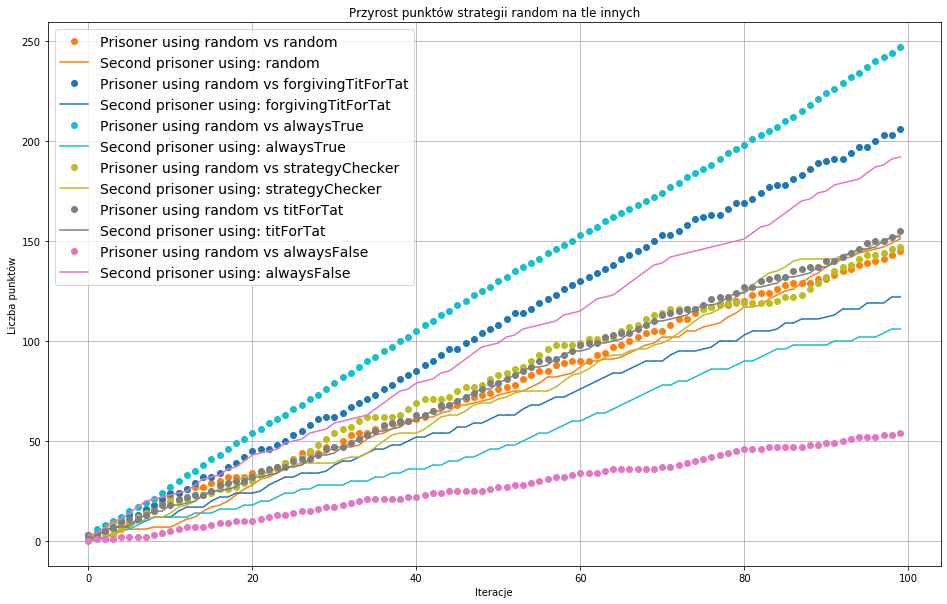

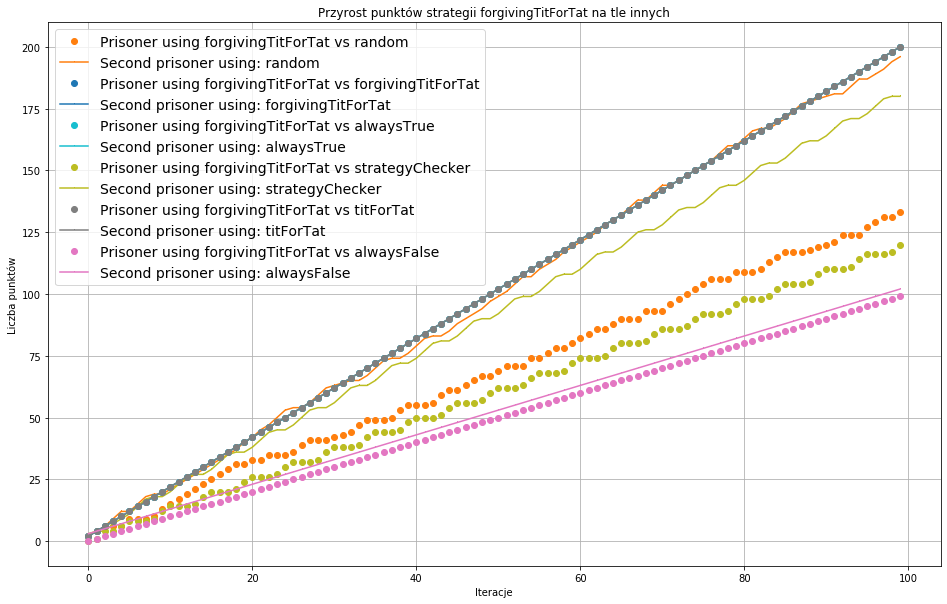

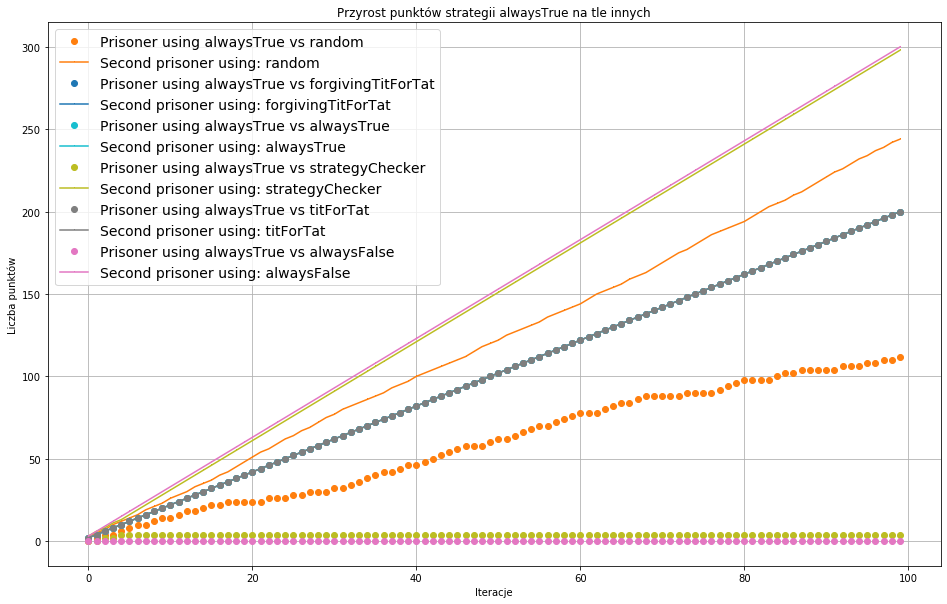

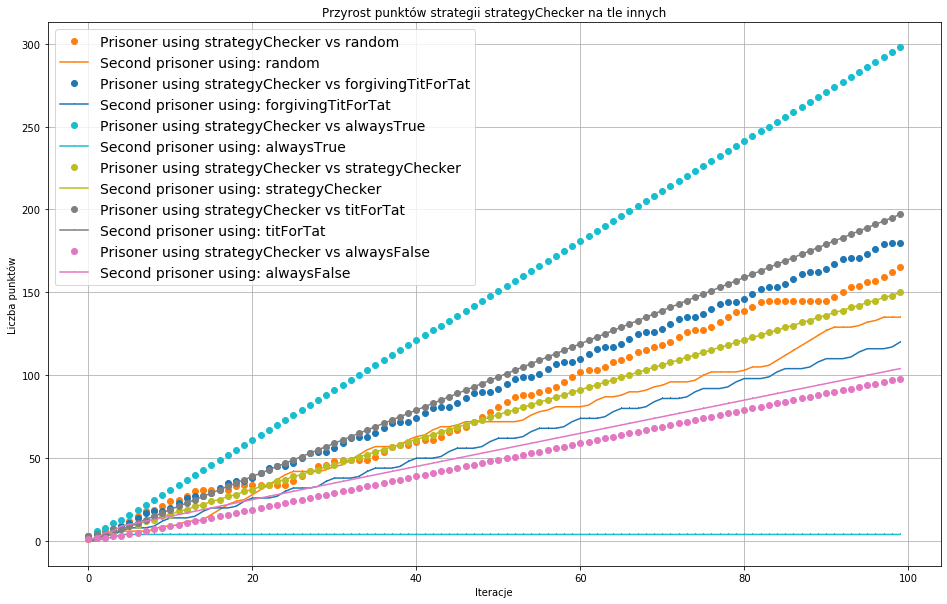

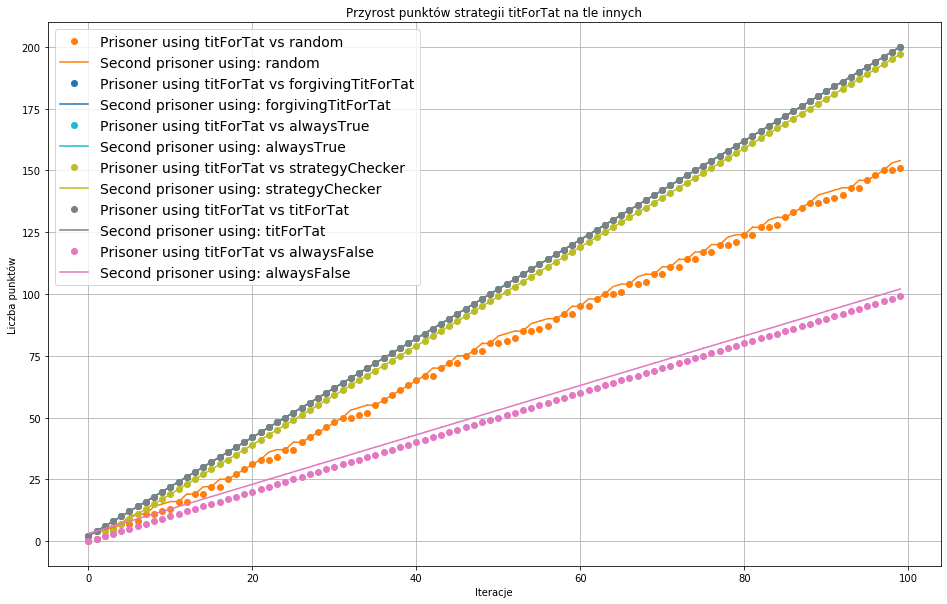

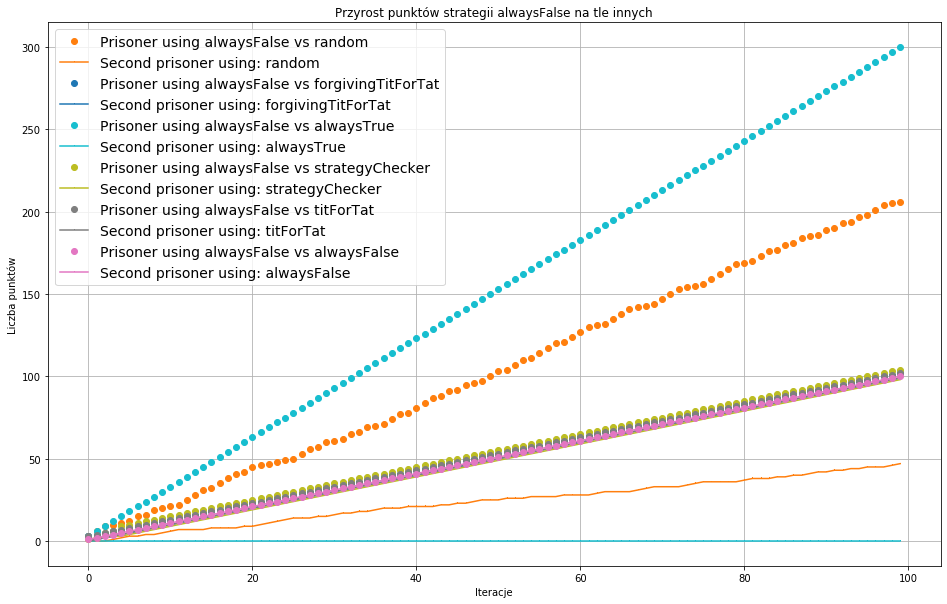

In [6]:
reader = pd.read_csv("data/1.csv")
strategies = set(reader['firstAlg'])
for strategy in strategies:
    stg_reader = reader.loc[reader['firstAlg'] == strategy]
    time_plot_all(stg_reader)

In [7]:
path = "data/"
outputPath = 'calculated.csv'
calculate_summary(path, outputPath)

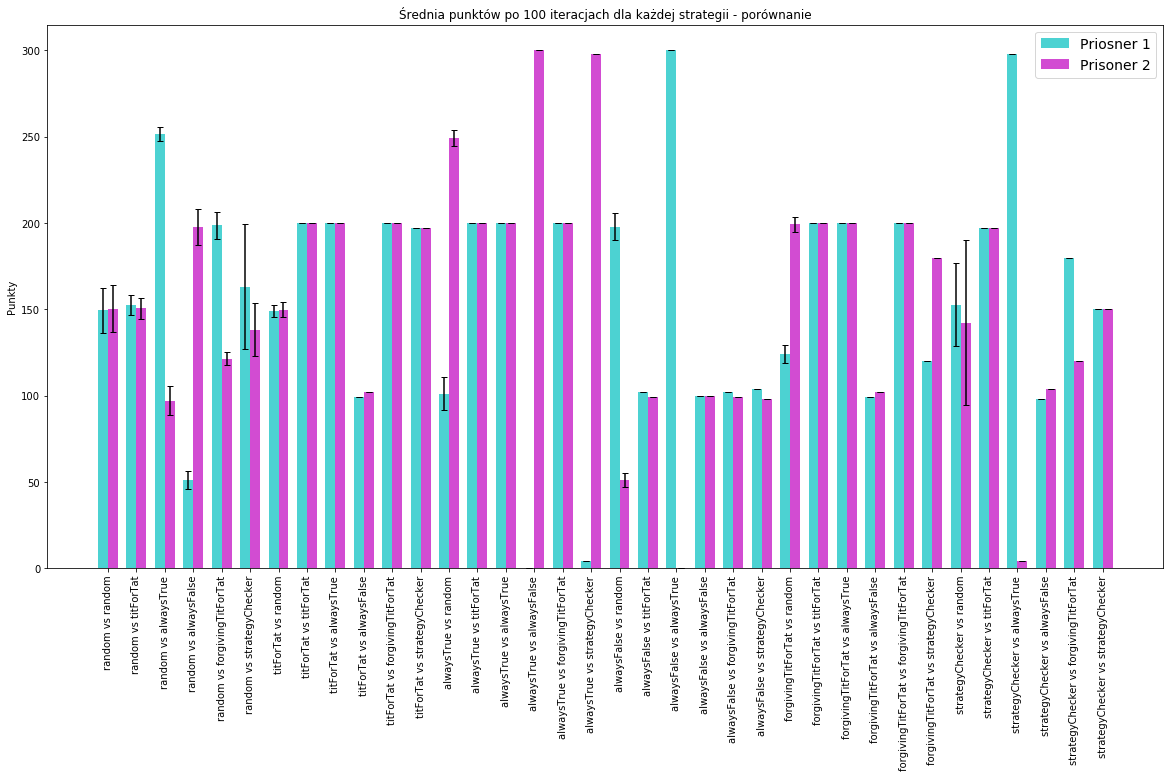

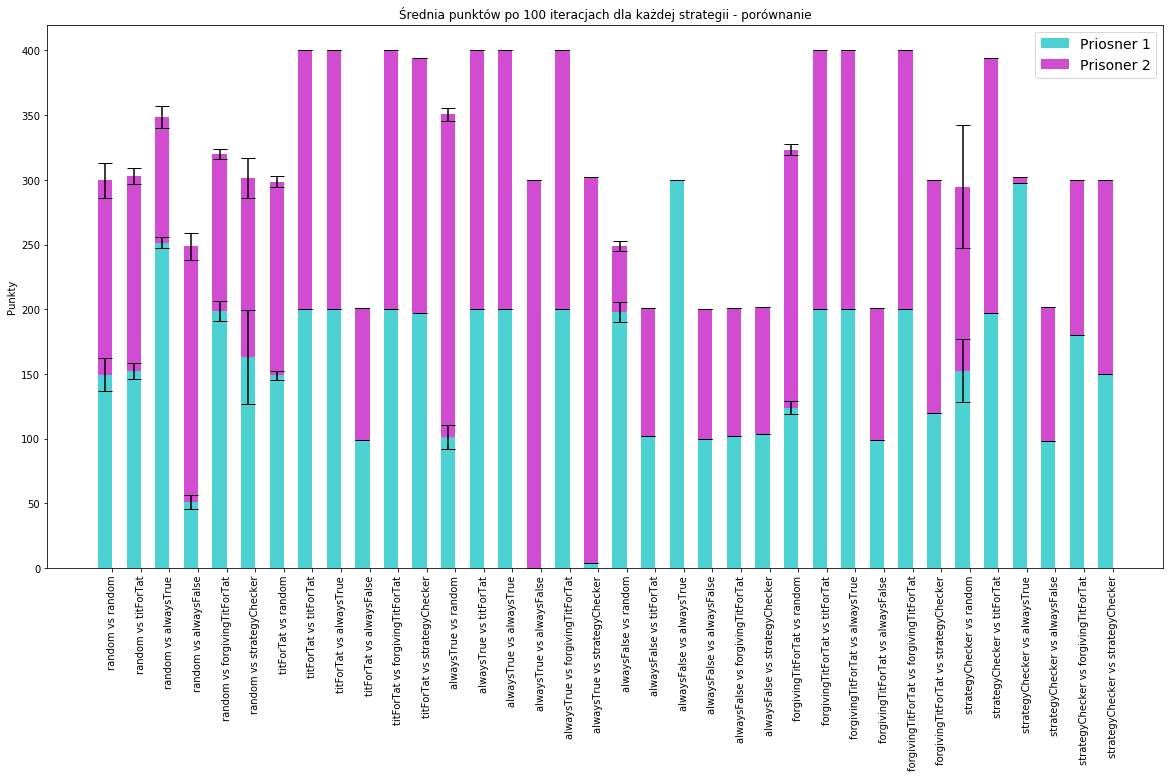

In [8]:
calculated = pd.read_csv(outputPath)
summary_plot(calculated)
summary_plot_stacked(calculated)